In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import json
import datetime


from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering
#import scipy.cluster.hierarchy as sch

#import April12.ipynb
#%store -r icd_grouped 
import statsmodels.api as sm
from patsy import dmatrices 

# model selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

import seaborn

/Users/kathy908000/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


# Data Preprocessing

In [3]:
grouped = pd.read_csv('icd_grouped2.csv')
grouped.shape

/Users/kathy908000/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,2,3,4,6,8,9,12,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1048575, 16)

In [4]:
grouped = grouped[:634709]
grouped.tail()

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,group2,lv.1_code,lv.2_code,lv.1_group,lv.2_group,SUBJECT_ID,HADM_ID,GENDER,DOB,DOD,DOD_HOSP
634704,13998.0,V9081,Retained glass fragments,Retained glass fragments,V9,18.0,0,0.0,Not Found,Not Found,51390.0,162668.0,M,12/8/84 0:00,0.0,NaN
634705,13998.0,V9081,Retained glass fragments,Retained glass fragments,V9,18.0,0,0.0,Not Found,Not Found,54221.0,107972.0,F,12/5/64 0:00,0.0,NaN
634706,13998.0,V9081,Retained glass fragments,Retained glass fragments,V9,18.0,0,0.0,Not Found,Not Found,97733.0,177960.0,M,3/22/56 0:00,0.0,NaN
634707,14000.0,V9089,Retain FB NEC,Other specified retained foreign body,V9,18.0,0,0.0,Not Found,Not Found,12367.0,131308.0,F,2/15/49 0:00,0.0,NaN
634708,14005.0,V9103,Twin gest-dich/diamniotc,"Twin gestation, dichorionic/diamniotic (two pl...",V9,18.0,0,0.0,Not Found,Not Found,89303.0,139801.0,F,2/22/45 0:00,0.0,NaN


In [5]:
grouped.shape

(634709, 16)

In [6]:

merged=pd.read_csv('icd_grouped.csv')
merged.head(30)

#DOD 0 if not died, 1 if died 
#Missing Subject ID

/Users/kathy908000/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,lv.1_code,lv.2_code,lv.1_group,lv.2_group,Unnamed: 0,SUBJECT_ID,HADM_ID,SEQ_NUM,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,188,1186,Pulmon TB NEC-oth test,"Other specified pulmonary tuberculosis, tuberc...",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,581403,84318,188604,5,42458,F,7/17/39 0:00,0,NaN,NaN,0
1,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,137110,12139,148809,3,11489,M,1/24/92 0:00,0,NaN,NaN,0
2,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,236331,21192,140260,8,19998,M,10/17/86 0:00,0,NaN,NaN,0
3,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,437948,52831,106939,3,34186,M,4/18/01 0:00,0,NaN,NaN,0
4,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,459979,57599,180150,4,35441,F,8/24/59 0:00,0,NaN,NaN,0
5,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,465492,58702,114246,18,35752,F,11/17/61 0:00,1,12/6/14 0:00,12/6/14 0:00,1
6,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,512387,68946,182954,9,38472,M,1854-03-20 00:00:00,1,9/19/54 0:00,9/19/54 0:00,1
7,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,589168,86226,106915,2,42918,M,12/29/64 0:00,0,NaN,NaN,0
8,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,604333,89840,186211,9,43862,M,6/25/10 0:00,1,10/27/92 0:00,10/27/92 0:00,1
9,192,1193,Pulmon TB NOS-micro dx,"Pulmonary tuberculosis, unspecified, tubercle ...",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,250894,22532,167853,1,21265,F,8/20/64 0:00,0,NaN,NaN,0


In [7]:
merged.tail()

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,lv.1_code,lv.2_code,lv.1_group,lv.2_group,Unnamed: 0,SUBJECT_ID,HADM_ID,SEQ_NUM,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
634704,14434,V741,Screening-pulmonary TB,Screening examination for pulmonary tuberculosis,V7,V70-V82,1074,PERSONS WITHOUT REPORTED DIAGNOSIS ENCOUNTERED...,Special screening examination for bacterial an...,80739,7241,127440,18,6852,M,9/13/39 0:00,0,NaN,NaN,0
634705,14434,V741,Screening-pulmonary TB,Screening examination for pulmonary tuberculosis,V7,V70-V82,1074,PERSONS WITHOUT REPORTED DIAGNOSIS ENCOUNTERED...,Special screening examination for bacterial an...,463237,58247,159012,28,35621,F,2/2/87 0:00,1,NaN,12/27/58 0:00,1
634706,14434,V741,Screening-pulmonary TB,Screening examination for pulmonary tuberculosis,V7,V70-V82,1074,PERSONS WITHOUT REPORTED DIAGNOSIS ENCOUNTERED...,Special screening examination for bacterial an...,488857,63866,108244,9,37112,M,9/30/45 0:00,0,NaN,NaN,0
634707,14434,V741,Screening-pulmonary TB,Screening examination for pulmonary tuberculosis,V7,V70-V82,1074,PERSONS WITHOUT REPORTED DIAGNOSIS ENCOUNTERED...,Special screening examination for bacterial an...,503431,67050,118850,16,37957,M,8/27/43 0:00,1,2/21/00 0:00,2/21/00 0:00,1
634708,14434,V741,Screening-pulmonary TB,Screening examination for pulmonary tuberculosis,V7,V70-V82,1074,PERSONS WITHOUT REPORTED DIAGNOSIS ENCOUNTERED...,Special screening examination for bacterial an...,562956,80344,102906,29,41382,M,1/29/61 0:00,0,NaN,NaN,0


In [8]:
merged['DOD'].head(20)

0     0
1     0
2     0
3     0
4     0
5     1
6     1
7     0
8     1
9     0
10    0
11    0
12    0
13    1
14    0
15    0
16    1
17    1
18    1
19    0
Name: DOD, dtype: int64

# Death Rate With Duplicate Patient Removed

In [19]:
merged.shape

(634709, 20)

In [20]:
mergednodup = merged.drop_duplicates('SUBJECT_ID', keep='first')

In [21]:
mergednodup.head()

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,lv.1_code,lv.2_code,lv.1_group,lv.2_group,Unnamed: 0,SUBJECT_ID,HADM_ID,SEQ_NUM,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,188,1186,Pulmon TB NEC-oth test,"Other specified pulmonary tuberculosis, tuberc...",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,581403,84318,188604,5,42458,F,7/17/39 0:00,0,NaN,NaN,0
1,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,137110,12139,148809,3,11489,M,1/24/92 0:00,0,NaN,NaN,0
2,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,236331,21192,140260,8,19998,M,10/17/86 0:00,0,NaN,NaN,0
3,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,437948,52831,106939,3,34186,M,4/18/01 0:00,0,NaN,NaN,0
4,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,459979,57599,180150,4,35441,F,8/24/59 0:00,0,NaN,NaN,0


In [22]:
mergednodup = mergednodup.sort_values(by=['SUBJECT_ID'])
mergednodup.shape

(46517, 20)

In [23]:
totaldead= mergednodup.loc[mergednodup['DOD']==1]
totaldead.head()

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,lv.1_code,lv.2_code,lv.1_group,lv.2_group,Unnamed: 0,SUBJECT_ID,HADM_ID,SEQ_NUM,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
9080,660,389,Septicemia NOS,Unspecified septicemia,3,030-041,38,OTHER BACTERIAL DISEASES,Septicemia,10,3,145834,1,2,M,4/11/25 0:00,1,NaN,6/14/02 0:00,1
180528,4304,4019,Hypertension NOS,Unspecified essential hypertension,40,401-405,401,HYPERTENSIVE DISEASE,Essential hypertension,46,9,150750,6,8,M,1/26/08 0:00,1,11/14/49 0:00,11/14/49 0:00,1
48848,2024,1913,Mal neo parietal lobe,Malignant neoplasm of parietal lobe,19,190-199,191,MALIGNANT NEOPLASM OF OTHER AND UNSPECIFIED SI...,Malignant neoplasm of brain,52,11,194540,1,10,F,2/22/28 0:00,1,NaN,11/14/78 0:00,1
22065,1236,1570,Mal neo pancreas head,Malignant neoplasm of head of pancreas,15,150-159,157,MALIGNANT NEOPLASM OF DIGESTIVE ORGANS AND PER...,Malignant neoplasm of pancreas,54,12,112213,1,11,M,3/24/32 0:00,1,8/20/04 0:00,8/20/04 0:00,1
156094,3261,2948,Mental disor NEC oth dis,Other persistent mental disorders due to condi...,29,290-299,294,PSYCHOSES,Persistent mental disorders due to conditions ...,98,19,109235,7,16,M,1808-08-05 00:00:00,1,NaN,8/18/09 0:00,1


In [24]:
totaldead.shape

(15756, 20)

In [25]:
female = mergednodup.loc[mergednodup['GENDER']=='F']
female.head()
diedfemale = female.loc[female['DOD']==1]
female.shape

(20398, 20)

In [26]:
diedfemale.shape

(7234, 20)

In [27]:
male = mergednodup.loc[mergednodup['GENDER']=='M']
#male.head()
diedmale = male.loc[male['DOD']==1]
#diedmale.head()

male.shape

(26119, 20)

In [28]:
diedmale.shape

(8522, 20)

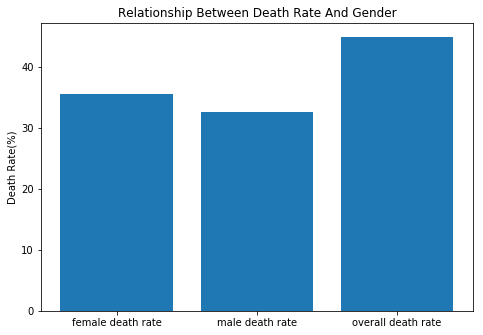

In [29]:
femalerate = 7234/20398*100
malerate = 8522/26119*100
overallrate = 285223/634709*100
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

categoryx = ['female death rate', 'male death rate', 'overall death rate']
fractiony = [femalerate, malerate, overallrate]  # calcaulate
ax.bar(categoryx,fractiony)

plt.title('Relationship Between Death Rate And Gender')
plt.ylabel("Death Rate(%)")
plt.show() 

# Commonly Diagnosed Diseases

In [37]:
merged.shape
female = merged.loc[merged['GENDER']=='F']
female.shape

(280984, 20)

In [38]:
ftop = female['SHORT_TITLE_x'].value_counts()
ftop[:11]

Hypertension NOS            9370
CHF NOS                     6106
Atrial fibrillation         5512
Crnry athrscl natve vssl    4322
Urin tract infection NOS    4027
Acute kidney failure NOS    3941
DMII wo cmp nt st uncntr    3902
Hyperlipidemia NEC/NOS      3537
Acute respiratry failure    3473
Hypothyroidism NOS          3307
Esophageal reflux           2990
Name: SHORT_TITLE_x, dtype: int64

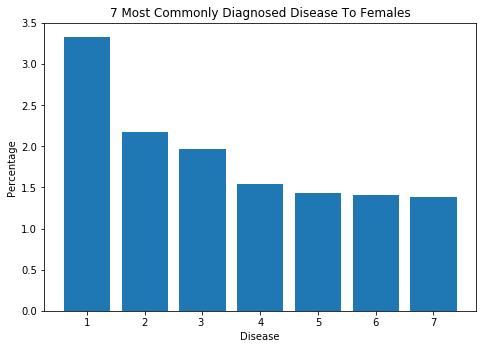

In [39]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

categoryx = ['1', '2', '3 ', '4', '5', '6', '7']
fractiony = [9370/280984*100, 6106/280984*100 , 5512/280984*100,  4322/280984*100, 4027/280984*100, 3941/280984*100, 3902/280984*100]  # calcaulate
ax.bar(categoryx,fractiony)

plt.title('7 Most Commonly Diagnosed Disease To Females')
plt.ylabel("Percentage")
plt.xlabel("Disease")
plt.show()

In [40]:
male = merged.loc[merged['GENDER']=='M']
male.shape

(353725, 20)

In [41]:
mtop = male['SHORT_TITLE_x'].value_counts()
mtop[:11]

Hypertension NOS            11333
Crnry athrscl natve vssl     8107
Atrial fibrillation          7379
CHF NOS                      7005
Acute kidney failure NOS     5178
DMII wo cmp nt st uncntr     5156
Hyperlipidemia NEC/NOS       5153
Acute respiratry failure     4024
Pure hypercholesterolem      3494
Esophageal reflux            3336
Need prphyl vc vrl hepat     3099
Name: SHORT_TITLE_x, dtype: int64

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

categoryx = ['1', '2', '3 ', '4', '5', '6', '7']
fractiony = [11333/353725*100, 7005/353725*100 ,  7379/353725*100,   8107/353725*100, 4024/353725*100]  # calcaulate
ax.bar(categoryx,fractiony)

plt.title('7 Most Commonly Diagnosed Disease To Males')
plt.ylabel("Percentage")
plt.xlabel("Disease")
plt.show()

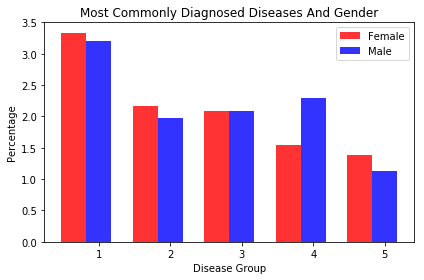

In [42]:
# Side By Side Barplot 
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 5
means_frank = (9370/280984*100, 6106/280984*100, 7379/353725*100, 4322/280984*100, 3902/280984*100)
means_guido = (11333/353725*100, 7005/353725*100 ,  7379/353725*100,   8107/353725*100, 4024/353725*100)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='r',
label='Female')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='b',
label='Male')

plt.xlabel('Disease Group')
plt.ylabel('Percentage')
plt.title('Most Commonly Diagnosed Diseases And Gender')
plt.xticks(index + bar_width, ('1', '2', '3', '4', '5'))
plt.legend()

plt.tight_layout()
plt.show()

#side by side barplot 
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

data = [[9370/280984*100, 6106/280984*100, 7379/353725*100, 4322/280984*100, 3902/280984*100],
[[11333/353725*100, 7005/353725*100 ,  7379/353725*100,   8107/353725*100, 4024/353725*100] ]
#X= np.arange(5)
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'r', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'b', width = 0.25)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

categoryx = ['1', '2', '3 ', '4', '5', '6', '7']
fractiony = [11333/353725*100, 7005/353725*100 ,  7379/353725*100,   8107/353725*100, 4024/353725*100]  # calcaulate
ax.bar(categoryx,fractiony)

plt.title('7 Most Commonly Diagnosed Disease To Males')
plt.ylabel("Percentage")
plt.xlabel("Disease")
plt.show()

In [43]:
12891/634709*100

2.031009486237

In [44]:
top10 = top[:11]
top10

42    53028
27    40737
41    31396
40    27988
28    23659
99    22011
78    21318
58    19415
V4    19134
51    19076
V1    18548
Name: group, dtype: int64

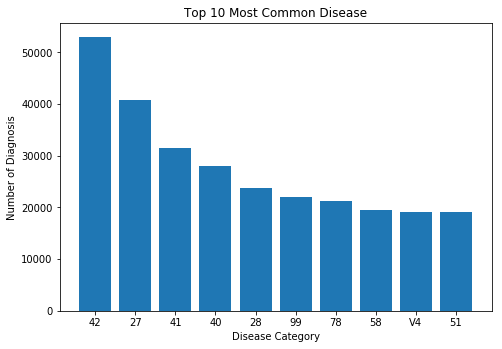

In [45]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

categoryx = ['42', '27', '41', '40', '28', '99', '78', '58', 'V4', '51']
#categoryx = ['ARTHROPOD-BORNE VIRAL DISEASES', 'MALIGNANT NEOPLASM', 'MALIGNANT NEOPLASM OF RESPIRATORY SYSTEM', '20', '15']
fractiony = [53028, 40737, 31396, 27988, 23659, 22011, 21318, 19415, 19134, 19076]  # calcaulate
ax.bar(categoryx,fractiony)

plt.title('Top 10 Most Common Disease')
plt.ylabel("Number of Diagnosis")
plt.xlabel("Disease Category")
plt.show()

# Data Preprocessing For Logistic Regression

In [53]:
#seaborn.pairplot(merged)
datamap = merged.copy()

In [54]:
datamap['GENDER'] = datamap['GENDER'].map({'F':0, 'M': 1})
datamap.head()

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,lv.1_code,lv.2_code,lv.1_group,lv.2_group,Unnamed: 0,SUBJECT_ID,HADM_ID,SEQ_NUM,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,188,1186,Pulmon TB NEC-oth test,"Other specified pulmonary tuberculosis, tuberc...",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,581403,84318,188604,5,42458,0,7/17/39 0:00,0,NaN,NaN,0
1,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,137110,12139,148809,3,11489,1,1/24/92 0:00,0,NaN,NaN,0
2,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,236331,21192,140260,8,19998,1,10/17/86 0:00,0,NaN,NaN,0
3,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,437948,52831,106939,3,34186,1,4/18/01 0:00,0,NaN,NaN,0
4,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,459979,57599,180150,4,35441,0,8/24/59 0:00,0,NaN,NaN,0


In [55]:
datamap.dtypes

ROW_ID_x          int64
ICD9_CODE        object
SHORT_TITLE_x    object
LONG_TITLE_x     object
group            object
lv.1_code        object
lv.2_code         int64
lv.1_group       object
lv.2_group       object
Unnamed: 0        int64
SUBJECT_ID        int64
HADM_ID           int64
SEQ_NUM           int64
ROW_ID_y          int64
GENDER            int64
DOB              object
DOD               int64
DOD_HOSP         object
DOD_SSN          object
EXPIRE_FLAG       int64
dtype: object

In [60]:
datamap = datamap[datamap['group'].notna()]
datamap.head(30)

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,lv.1_code,lv.2_code,lv.1_group,lv.2_group,Unnamed: 0,SUBJECT_ID,HADM_ID,SEQ_NUM,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,188,1186,Pulmon TB NEC-oth test,"Other specified pulmonary tuberculosis, tuberc...",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,581403,84318,188604,5,42458,0,7/17/39 0:00,0,NaN,NaN,0
1,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,137110,12139,148809,3,11489,1,1/24/92 0:00,0,NaN,NaN,0
2,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,236331,21192,140260,8,19998,1,10/17/86 0:00,0,NaN,NaN,0
3,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,437948,52831,106939,3,34186,1,4/18/01 0:00,0,NaN,NaN,0
4,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,459979,57599,180150,4,35441,0,8/24/59 0:00,0,NaN,NaN,0
5,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,465492,58702,114246,18,35752,0,11/17/61 0:00,1,12/6/14 0:00,12/6/14 0:00,1
6,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,512387,68946,182954,9,38472,1,1854-03-20 00:00:00,1,9/19/54 0:00,9/19/54 0:00,1
7,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,589168,86226,106915,2,42918,1,12/29/64 0:00,0,NaN,NaN,0
8,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,604333,89840,186211,9,43862,1,6/25/10 0:00,1,10/27/92 0:00,10/27/92 0:00,1
9,192,1193,Pulmon TB NOS-micro dx,"Pulmonary tuberculosis, unspecified, tubercle ...",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,250894,22532,167853,1,21265,0,8/20/64 0:00,0,NaN,NaN,0


#groups to int
#only numeric columns 
datamap['group'] = datamap['group'].str.replace('V','10',regex=True)
datamap['group'] = datamap['group'].str.replace('E','11',regex=True)

#datamap['group'] = datamap['group'].astype(np.int)
datamap['group'] = datamap['group'].astype(np.float)
datamap.head(30)

#datamap = datamap.dropna()
#datamap = datamap[datamap['group'].notna()]
#datamap.head(30)


In [63]:
datamap['group'] = datamap['group'].astype('str')

In [64]:
datamap['DOD']

0         0
1         0
2         0
3         0
4         0
         ..
634704    0
634705    1
634706    0
634707    1
634708    0
Name: DOD, Length: 634709, dtype: int64

# 19 Groups Binary Variables

In [66]:
grouped = grouped[grouped['group'].notna()]
grouped.head(30)

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,group2,lv.1_code,lv.2_code,lv.1_group,lv.2_group,SUBJECT_ID,HADM_ID,GENDER,DOB,DOD,DOD_HOSP
0,241.0,30,Salmonella enteritis,Salmonella gastroenteritis,0,1.0,001-009,3.0,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,27367.0,136441.0,F,5/26/21 0:00,1.0,9/29/02 0:00
1,241.0,30,Salmonella enteritis,Salmonella gastroenteritis,0,1.0,001-009,3.0,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,65733.0,168926.0,M,1/17/95 0:00,1.0,1/5/67 0:00
2,242.0,31,Salmonella septicemia,Salmonella septicemia,0,1.0,001-009,3.0,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,69141.0,136542.0,M,2/25/19 0:00,0.0,NaN
3,249.0,38,Salmonella infection NEC,Other specified salmonella infections,0,1.0,001-009,3.0,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,44437.0,181557.0,F,12/28/43 0:00,0.0,NaN
4,249.0,38,Salmonella infection NEC,Other specified salmonella infections,0,1.0,001-009,3.0,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,83908.0,180356.0,M,2/13/49 0:00,0.0,NaN
5,250.0,39,Salmonella infection NOS,"Salmonella infection, unspecified",0,1.0,001-009,3.0,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,46693.0,183574.0,M,2/9/86 0:00,0.0,NaN
6,252.0,41,Shigella flexneri,Shigella flexneri,0,1.0,001-009,4.0,INTESTINAL INFECTIOUS DISEASES,Shigellosis,6928.0,182382.0,F,3/31/26 0:00,0.0,NaN
7,252.0,41,Shigella flexneri,Shigella flexneri,0,1.0,001-009,4.0,INTESTINAL INFECTIOUS DISEASES,Shigellosis,12021.0,184622.0,M,9/2/10 0:00,0.0,NaN
8,252.0,41,Shigella flexneri,Shigella flexneri,0,1.0,001-009,4.0,INTESTINAL INFECTIOUS DISEASES,Shigellosis,84972.0,121388.0,M,9/25/49 0:00,0.0,NaN
9,255.0,48,Shigella infection NEC,Other specified shigella infections,0,1.0,001-009,4.0,INTESTINAL INFECTIOUS DISEASES,Shigellosis,9833.0,167211.0,M,1/11/91 0:00,1.0,NaN


In [67]:
group2 = grouped['group2']
group2

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
634704    18.0
634705    18.0
634706    18.0
634707    18.0
634708    18.0
Name: group2, Length: 634709, dtype: float64

In [68]:
# binary variable for each g2 

arr1= []

for i in range(634709):
    if  group2.iloc[i]==1:
        arr1.append(1)
        
    else:
        arr1.append(0)

grouped['bg1'] = arr1

grouped.head()      
#df.iloc[3,4] 3rd row, 4th column


,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,group2,lv.1_code,lv.2_code,lv.1_group,lv.2_group,SUBJECT_ID,HADM_ID,GENDER,DOB,DOD,DOD_HOSP,bg1
0,241.0,30,Salmonella enteritis,Salmonella gastroenteritis,0,1.0,001-009,3.0,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,27367.0,136441.0,F,5/26/21 0:00,1.0,9/29/02 0:00,1
1,241.0,30,Salmonella enteritis,Salmonella gastroenteritis,0,1.0,001-009,3.0,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,65733.0,168926.0,M,1/17/95 0:00,1.0,1/5/67 0:00,1
2,242.0,31,Salmonella septicemia,Salmonella septicemia,0,1.0,001-009,3.0,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,69141.0,136542.0,M,2/25/19 0:00,0.0,NaN,1
3,249.0,38,Salmonella infection NEC,Other specified salmonella infections,0,1.0,001-009,3.0,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,44437.0,181557.0,F,12/28/43 0:00,0.0,NaN,1
4,249.0,38,Salmonella infection NEC,Other specified salmonella infections,0,1.0,001-009,3.0,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,83908.0,180356.0,M,2/13/49 0:00,0.0,NaN,1


In [69]:
arr2= []

for i in range(634709):
    if  group2.iloc[i]==2:
        arr2.append(1)
        
    else:
        arr2.append(0)

grouped['bg2'] = arr2
grouped.head()

#grouped.loc[grouped['group2']==2]
# bg2 = 1 if group2 is 2 o/w 0

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,group2,lv.1_code,lv.2_code,lv.1_group,lv.2_group,SUBJECT_ID,HADM_ID,GENDER,DOB,DOD,DOD_HOSP,bg1,bg2
0,241.0,30,Salmonella enteritis,Salmonella gastroenteritis,0,1.0,001-009,3.0,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,27367.0,136441.0,F,5/26/21 0:00,1.0,9/29/02 0:00,1,0
1,241.0,30,Salmonella enteritis,Salmonella gastroenteritis,0,1.0,001-009,3.0,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,65733.0,168926.0,M,1/17/95 0:00,1.0,1/5/67 0:00,1,0
2,242.0,31,Salmonella septicemia,Salmonella septicemia,0,1.0,001-009,3.0,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,69141.0,136542.0,M,2/25/19 0:00,0.0,NaN,1,0
3,249.0,38,Salmonella infection NEC,Other specified salmonella infections,0,1.0,001-009,3.0,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,44437.0,181557.0,F,12/28/43 0:00,0.0,NaN,1,0
4,249.0,38,Salmonella infection NEC,Other specified salmonella infections,0,1.0,001-009,3.0,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,83908.0,180356.0,M,2/13/49 0:00,0.0,NaN,1,0


In [70]:
#merged2.iloc[40000:40050]
grouped.loc[grouped['group2']==2]


,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,group2,lv.1_code,lv.2_code,lv.1_group,lv.2_group,SUBJECT_ID,HADM_ID,GENDER,DOB,DOD,DOD_HOSP,bg1,bg2
19322,1141.0,1419,Malig neo tongue NOS,"Malignant neoplasm of tongue, unspecified",14,2.0,140-149,141.0,"MALIGNANT NEOPLASM OF LIP, ORAL CAVITY, AND PH...",Malignant neoplasm of tongue,1755.0,133138.0,F,6/8/35 0:00,0.0,NaN,0,1
19323,1141.0,1419,Malig neo tongue NOS,"Malignant neoplasm of tongue, unspecified",14,2.0,140-149,141.0,"MALIGNANT NEOPLASM OF LIP, ORAL CAVITY, AND PH...",Malignant neoplasm of tongue,15470.0,112280.0,F,10/6/58 0:00,1.0,1/12/45 0:00,0,1
19324,1141.0,1419,Malig neo tongue NOS,"Malignant neoplasm of tongue, unspecified",14,2.0,140-149,141.0,"MALIGNANT NEOPLASM OF LIP, ORAL CAVITY, AND PH...",Malignant neoplasm of tongue,65824.0,194922.0,M,11/29/49 0:00,1.0,1/31/34 0:00,0,1
19325,1141.0,1419,Malig neo tongue NOS,"Malignant neoplasm of tongue, unspecified",14,2.0,140-149,141.0,"MALIGNANT NEOPLASM OF LIP, ORAL CAVITY, AND PH...",Malignant neoplasm of tongue,74686.0,130450.0,M,3/14/90 0:00,1.0,1/16/56 0:00,0,1
19326,1142.0,1420,Malig neo parotid,Malignant neoplasm of parotid gland,14,2.0,140-149,142.0,"MALIGNANT NEOPLASM OF LIP, ORAL CAVITY, AND PH...",Malignant neoplasm of major salivary glands,4800.0,106976.0,M,3/5/49 0:00,0.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33356,2571.0,2354,Unc behav neo peritoneum,Neoplasm of uncertain behavior of retroperiton...,23,2.0,0,0.0,Not Found,Not Found,31217.0,119143.0,M,8/12/66 0:00,0.0,NaN,0,1
33357,2571.0,2354,Unc behav neo peritoneum,Neoplasm of uncertain behavior of retroperiton...,23,2.0,0,0.0,Not Found,Not Found,49853.0,179842.0,M,1/6/89 0:00,0.0,NaN,0,1
33358,2571.0,2354,Unc behav neo peritoneum,Neoplasm of uncertain behavior of retroperiton...,23,2.0,0,0.0,Not Found,Not Found,63073.0,134830.0,M,12/18/23 0:00,0.0,NaN,0,1
132034,2693.0,30285,"Gend iden dis,adol/adult",Gender identity disorder in adolescents or adults,30,2.0,300-316,302.0,"NEUROTIC DISORDERS, PERSONALITY DISORDERS, AND...",Sexual and gender identity disorders,43459.0,178442.0,F,11/11/00 0:00,0.0,NaN,0,1


In [71]:
arr= []

for i in range(634709):
    if  group2.iloc[i]==3:
        arr.append(1)
        
    else:
        arr.append(0)

grouped['bg3'] = arr
#grouped.head()

#grouped.loc[grouped['group2']==3]

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,group2,lv.1_code,lv.2_code,lv.1_group,lv.2_group,SUBJECT_ID,HADM_ID,GENDER,DOB,DOD,DOD_HOSP,bg1,bg2,bg3
33359,1775.0,2409,Goiter NOS,"Goiter, unspecified",24,3.0,240-246,240.0,DISORDERS OF THYROID GLAND,Simple and unspecified goiter,671.0,126769.0,M,3/27/48 0:00,0.0,NaN,0,0,1
33360,1775.0,2409,Goiter NOS,"Goiter, unspecified",24,3.0,240-246,240.0,DISORDERS OF THYROID GLAND,Simple and unspecified goiter,2814.0,127288.0,F,9/24/62 0:00,0.0,NaN,0,0,1
33361,1775.0,2409,Goiter NOS,"Goiter, unspecified",24,3.0,240-246,240.0,DISORDERS OF THYROID GLAND,Simple and unspecified goiter,4290.0,155880.0,F,8/26/86 0:00,1.0,10/18/17 0:00,0,0,1
33362,1775.0,2409,Goiter NOS,"Goiter, unspecified",24,3.0,240-246,240.0,DISORDERS OF THYROID GLAND,Simple and unspecified goiter,5664.0,136159.0,F,11/6/48 0:00,0.0,NaN,0,0,1
33363,1775.0,2409,Goiter NOS,"Goiter, unspecified",24,3.0,240-246,240.0,DISORDERS OF THYROID GLAND,Simple and unspecified goiter,5911.0,190921.0,M,7/11/93 0:00,1.0,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100483,2216.0,2798,Immune mechanism dis NEC,Other specified disorders involving the immune...,27,3.0,270-279,279.0,OTHER METABOLIC AND IMMUNITY DISORDERS,Disorders involving the immune mechanism,23707.0,186045.0,F,4/12/92 0:00,0.0,NaN,0,0,1
100484,2216.0,2798,Immune mechanism dis NEC,Other specified disorders involving the immune...,27,3.0,270-279,279.0,OTHER METABOLIC AND IMMUNITY DISORDERS,Disorders involving the immune mechanism,51844.0,135757.0,M,7/13/91 0:00,0.0,NaN,0,0,1
100485,2216.0,2798,Immune mechanism dis NEC,Other specified disorders involving the immune...,27,3.0,270-279,279.0,OTHER METABOLIC AND IMMUNITY DISORDERS,Disorders involving the immune mechanism,53650.0,184951.0,F,9/3/72 0:00,1.0,1/5/29 0:00,0,0,1
100486,2216.0,2798,Immune mechanism dis NEC,Other specified disorders involving the immune...,27,3.0,270-279,279.0,OTHER METABOLIC AND IMMUNITY DISORDERS,Disorders involving the immune mechanism,53650.0,138141.0,F,9/3/72 0:00,1.0,1/5/29 0:00,0,0,1


In [72]:
arr= []
for i in range(634709):
    if  group2.iloc[i]==4:
        arr.append(1)
        
    else:
        arr.append(0)

grouped['bg4'] = arr
#grouped.head()

#grouped.loc[grouped['group2']==4]

In [73]:
arr= []

for i in range(634709):
    if  group2.iloc[i]==5:
        arr.append(1)
        
    else:
        arr.append(0)

grouped['bg5'] = arr
#grouped.head()

#grouped.loc[grouped['group2']==5]

In [74]:
arr= []

for i in range(634709):
    if  group2.iloc[i]==6:
        arr.append(1)        
    else:
        arr.append(0)

grouped['bg6'] = arr
#grouped.head()

#grouped.loc[grouped['group2']==6]

In [75]:
arr= []

for i in range(634709):
    if  group2.iloc[i]==7:
        arr.append(1)
        
    else:
        arr.append(0)

grouped['bg7'] = arr
#grouped.head()

#grouped.loc[grouped['group2']==7]

In [76]:
arr= []
for i in range(634709):
    if  group2.iloc[i]==8:
        arr.append(1) 
    else:
        arr.append(0)

grouped['bg8'] = arr
#grouped.head()
#grouped.loc[grouped['group2']==8]

In [77]:
arr= []
for i in range(634709):
    if  group2.iloc[i]==9:
        arr.append(1) 
    else:
        arr.append(0)

grouped['bg9'] = arr
#grouped.head()
#grouped.loc[grouped['group2']==9]

In [78]:
arr= []
for i in range(634709):
    if  group2.iloc[i]==10:
        arr.append(1) 
    else:
        arr.append(0)

grouped['bg10'] = arr
#grouped.head()
#grouped.loc[grouped['group2']==10]

In [79]:
arr= []
for i in range(634709):
    if  group2.iloc[i]==11:
        arr.append(1) 
    else:
        arr.append(0)

grouped['bg11'] = arr
#grouped.head()
#grouped.loc[grouped['group2']==11]

In [80]:
arr= []
for i in range(634709):
    if  group2.iloc[i]==12:
        arr.append(1) 
    else:
        arr.append(0)

grouped['bg12'] = arr
#grouped.head()
#grouped.loc[grouped['group2']==12]

In [81]:
arr= []
for i in range(634709):
    if  group2.iloc[i]==13:
        arr.append(1) 
    else:
        arr.append(0)

grouped['bg13'] = arr
#grouped.head()
#grouped.loc[grouped['group2']==13]

In [82]:
arr= []
for i in range(634709):
    if  group2.iloc[i]==14:
        arr.append(1) 
    else:
        arr.append(0)

grouped['bg14'] = arr
#grouped.head()
#grouped.loc[grouped['group2']==14]

In [83]:
arr= []
for i in range(634709):
    if  group2.iloc[i]==15:
        arr.append(1) 
    else:
        arr.append(0)

grouped['bg15'] = arr
#grouped.head()
#grouped.loc[grouped['group2']==15]

In [84]:
arr= []
for i in range(634709):
    if  group2.iloc[i]==16:
        arr.append(1) 
    else:
        arr.append(0)

grouped['bg16'] = arr
#grouped.head()
#grouped.loc[grouped['group2']==16]

In [85]:
arr= []
for i in range(634709):
    if  group2.iloc[i]==17:
        arr.append(1) 
    else:
        arr.append(0)

grouped['bg17'] = arr
#grouped.head()
#grouped.loc[grouped['group2']==17]

In [86]:
arr= []
for i in range(634709):
    if  group2.iloc[i]==18:
        arr.append(1) 
    else:
        arr.append(0)

grouped['bg18'] = arr
#grouped.head()
#grouped.loc[grouped['group2']==18]

In [87]:
arr= []
for i in range(634709):
    if  group2.iloc[i]==19:
        arr.append(1) 
    else:
        arr.append(0)

grouped['bg19'] = arr
#grouped.head()
#grouped.loc[grouped['group2']==19]

In [88]:
grouped['GENDER'] = grouped['GENDER'].map({'F':0, 'M': 1})
grouped.head()

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,group2,lv.1_code,lv.2_code,lv.1_group,lv.2_group,...,bg10,bg11,bg12,bg13,bg14,bg15,bg16,bg17,bg18,bg19
0,241.0,30,Salmonella enteritis,Salmonella gastroenteritis,0,1.0,001-009,3.0,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,...,0,0,0,0,0,0,0,0,0,0
1,241.0,30,Salmonella enteritis,Salmonella gastroenteritis,0,1.0,001-009,3.0,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,...,0,0,0,0,0,0,0,0,0,0
2,242.0,31,Salmonella septicemia,Salmonella septicemia,0,1.0,001-009,3.0,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,...,0,0,0,0,0,0,0,0,0,0
3,249.0,38,Salmonella infection NEC,Other specified salmonella infections,0,1.0,001-009,3.0,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,...,0,0,0,0,0,0,0,0,0,0
4,249.0,38,Salmonella infection NEC,Other specified salmonella infections,0,1.0,001-009,3.0,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,...,0,0,0,0,0,0,0,0,0,0


In [89]:
grouped.loc[grouped['group2']==19]

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,group2,lv.1_code,lv.2_code,lv.1_group,lv.2_group,...,bg10,bg11,bg12,bg13,bg14,bg15,bg16,bg17,bg18,bg19
538246,9617.0,E0064,Bike riding,Activities involving bike riding,E0,19.0,0,0.0,Not Found,Not Found,...,0,0,0,0,0,0,0,0,0,1
538247,9620.0,E0069,"Individ sports,athletics",Other activity involving other sports and athl...,E0,19.0,0,0.0,Not Found,Not Found,...,0,0,0,0,0,0,0,0,0,1
538248,9621.0,E0070,Tackle football,Activities involving american tackle football,E0,19.0,0,0.0,Not Found,Not Found,...,0,0,0,0,0,0,0,0,0,1
538249,9622.0,E0071,Amer flag/touch football,Activities involving american flag or touch fo...,E0,19.0,0,0.0,Not Found,Not Found,...,0,0,0,0,0,0,0,0,0,1
538250,9624.0,E0073,Baseball,Activities involving baseball,E0,19.0,0,0.0,Not Found,Not Found,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560753,14370.0,E989,Late eff inj-undet circ,"Late effects of injury, undetermined whether a...",E9,19.0,0,0.0,Not Found,Not Found,...,0,0,0,0,0,0,0,0,0,1
560754,14370.0,E989,Late eff inj-undet circ,"Late effects of injury, undetermined whether a...",E9,19.0,0,0.0,Not Found,Not Found,...,0,0,0,0,0,0,0,0,0,1
560755,14370.0,E989,Late eff inj-undet circ,"Late effects of injury, undetermined whether a...",E9,19.0,0,0.0,Not Found,Not Found,...,0,0,0,0,0,0,0,0,0,1
560756,14370.0,E989,Late eff inj-undet circ,"Late effects of injury, undetermined whether a...",E9,19.0,0,0.0,Not Found,Not Found,...,0,0,0,0,0,0,0,0,0,1


# Logistic Regression With 19 Groups y= death

In [90]:
y = grouped['DOD']
features = [ 'GENDER', 'bg1', 'bg2', 'bg3', 'bg4','bg5', 'bg6','bg7','bg8', 'bg9', 'bg10','bg11', 'bg12', 'bg13', 'bg14', 'bg15', 'bg16', 'bg17', 'bg18', 'bg19']
#features = ['group', 'GENDER']
X = grouped[features]
X

,GENDER,bg1,bg2,bg3,bg4,bg5,bg6,bg7,bg8,bg9,bg10,bg11,bg12,bg13,bg14,bg15,bg16,bg17,bg18,bg19
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634704,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
634705,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
634706,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
634707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [91]:
grouped.groupby(y).mean()

,ROW_ID_x,group2,lv.2_code,SUBJECT_ID,HADM_ID,GENDER,bg1,bg2,bg3,bg4,...,bg10,bg11,bg12,bg13,bg14,bg15,bg16,bg17,bg18,bg19
DOD,,,,,,,,,,,,,,,,,,,,,
0.0,6737.358698,10.219374,547.823464,42946.107753,150045.939588,0.561628,0.024276,0.011411,0.103575,0.034087,...,0.040651,0.001785,0.010787,0.022628,0.009557,0.052437,0.041936,0.072157,0.137290,0.040531
1.0,5875.532604,8.897119,498.433051,34954.031242,149995.742040,0.552003,0.038002,0.035236,0.108445,0.041185,...,0.062078,0.000105,0.016587,0.019160,0.002170,0.001217,0.046357,0.056437,0.091052,0.029265


In [92]:
model = sm.Logit(y,X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.658981
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    DOD   No. Observations:               634709
Model:                          Logit   Df Residuals:                   634689
Method:                           MLE   Df Model:                           19
Date:                Mon, 01 Jun 2020   Pseudo R-squ.:                 0.04220
Time:                        11:09:36   Log-Likelihood:            -4.1826e+05
converged:                       True   LL-Null:                   -4.3669e+05
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GENDER        -0.0392      0.005     -7.512      0.000      -0.049      -0.029
bg1            0.2669      0.015     18.048      0.000       0.238       0.296
bg2            0.9458      0.019     49.949      0.000       0.909       0.983
bg3           -0.1363      0.008    -16.553      0.000      -0.152      -0.120
bg4            0.0067      0.013      0.505      0.613      -0.019       0.033
bg5           -0.5870      0.014    -43.171      0.000      -0.614      -0.560
bg6           -0.2374      0.014    -17.505      0.000      -0.264      -0.211
bg7           -0.0214      0.006     -3.489      0.000      -0.033      -0.009
bg8            0.2937      0.010     28.813      0.000       0.274       0.314
bg9           -0.0804      0.011     -7.545      0.000      -0.101      -0.059
bg10           0.2420      0.012     20.802      0.000       0.219       0.265
bg11          -3.0350      0.187    -16.237      0.000      -3.401      -2.669
bg12           0.2493      0.022     11.316      0.000       0.206       0.293
bg13          -0.3532      0.018    -19.927      0.000      -0.388      -0.318
bg14          -1.6636      0.044    -37.932      0.000      -1.750      -1.578
bg15          -3.9455      0.054    -72.713      0.000      -4.052      -3.839
bg16          -0.0814      0.012     -6.600      0.000      -0.106      -0.057
bg17          -0.4252      0.011    -40.235      0.000      -0.446      -0.405
bg18          -0.5915      0.008    -71.619      0.000      -0.608      -0.575
bg19          -0.5066      0.014    -35.890      0.000      -0.534      -0.479
==============================================================================
"""

In [93]:
#y_pred = model.predict(X_test)
#y_pred

#y_pred = logreg.predict(X_test)

In [94]:
#accscore = model.score(X_test, )

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [96]:
def minAIC(X,y):
    variables = X.columns
    model = sm.Logit(y,X[variables]).fit()
    while True:
        maxp = np.max(model.pvalues)
        newvariables = variables[model.pvalues < maxp]
        newmodel = sm.Logit(y,X[variables]).fit()
        if newmodel.aic < model.aic:
            model = newmodel
            variables = newvariables
        else:
            break
    return model,variables

In [97]:
model,variables = minAIC(X_train, y_train)
model = sm.Logit(y_test,X_test[variables]).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.658828
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.658828
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.659110
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    DOD   No. Observations:               317355
Model:                          Logit   Df Residuals:                   317335
Method:                           MLE   Df Model:                           19
Date:                Mon, 01 Jun 2020   Pseudo R-squ.:                 0.04204
Time:                        11:09:41   Log-Likelihood:            -2.0917e+05
converged:                       True   LL-Null:                   -2.1835e+05
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GENDER        -0.0356      0.007     -4.819      0.000      -0.050      -0.021
bg1            0.2578      0.021     12.332      0.000       0.217       0.299
bg2            0.9188      0.027     34.523      0.000       0.867       0.971
bg3           -0.1324      0.012    -11.354      0.000      -0.155      -0.110
bg4           -0.0061      0.019     -0.327      0.743      -0.043       0.031
bg5           -0.5800      0.019    -30.297      0.000      -0.618      -0.542
bg6           -0.2267      0.019    -11.879      0.000      -0.264      -0.189
bg7           -0.0226      0.009     -2.607      0.009      -0.040      -0.006
bg8            0.2981      0.014     20.654      0.000       0.270       0.326
bg9           -0.0924      0.015     -6.140      0.000      -0.122      -0.063
bg10           0.2401      0.016     14.590      0.000       0.208       0.272
bg11          -2.8365      0.243    -11.696      0.000      -3.312      -2.361
bg12           0.2464      0.031      7.947      0.000       0.186       0.307
bg13          -0.3457      0.025    -13.763      0.000      -0.395      -0.296
bg14          -1.7494      0.064    -27.433      0.000      -1.874      -1.624
bg15          -3.8824      0.074    -52.347      0.000      -4.028      -3.737
bg16          -0.0730      0.017     -4.188      0.000      -0.107      -0.039
bg17          -0.4287      0.015    -28.658      0.000      -0.458      -0.399
bg18          -0.5958      0.012    -50.976      0.000      -0.619      -0.573
bg19          -0.5062      0.020    -25.264      0.000      -0.545      -0.467
==============================================================================
"""

In [98]:
#y_pred = model.predict(X_test)
#y_pred = Logit.predict(X_test)
#y_pred

#y_pred = logreg.predict(X_test)

In [99]:
#accscore = model.score_obs(X_test, y_test)

#  Hierarchical clustering With 19 Groups and Eucleadian Distance

In [105]:
#y = grouped['DOD']
#features = [ 'GENDER', 'bg1', 'bg2', 'bg3', 'bg4','bg5', 'bg6','bg7','bg8', 'bg9', 'bg10','bg11', 'bg12', 'bg13', 'bg14', 'bg15', 'bg16', 'bg17', 'bg18', 'bg19']
#features = ['group', 'GENDER']

data = grouped[['DOD', 'GENDER', 'bg1', 'bg2', 'bg3', 'bg4','bg5', 'bg6','bg7','bg8', 'bg9', 'bg10','bg11', 'bg12', 'bg13', 'bg14', 'bg15', 'bg16', 'bg17', 'bg18', 'bg19']]
data2 = data.sample(n=100)
data2.head()

,DOD,GENDER,bg1,bg2,bg3,bg4,bg5,bg6,bg7,bg8,...,bg10,bg11,bg12,bg13,bg14,bg15,bg16,bg17,bg18,bg19
128749,0.0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
309244,1.0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
68930,1.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
419548,0.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
592256,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


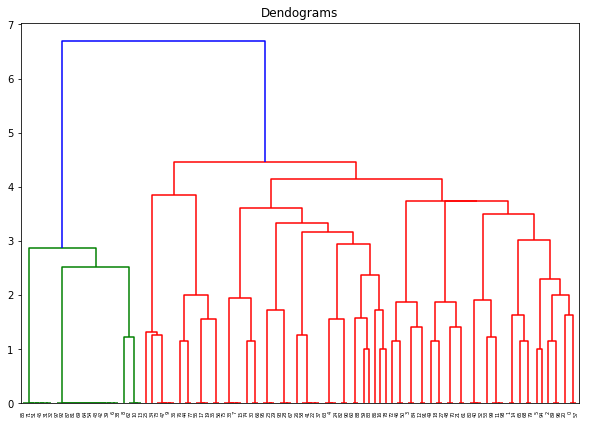

In [101]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
plt.ylabel("Distance")
plt.xlabel("")
dend = shc.dendrogram(shc.linkage(data2, method='ward'))

In [104]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
cluster.fit_predict(data2)

array([1, 1, 1, 5, 0, 1, 3, 0, 3, 4, 3, 1, 5, 3, 1, 0, 0, 2, 6, 2, 1, 6,
       0, 0, 0, 4, 0, 6, 0, 0, 0, 3, 3, 0, 4, 2, 4, 0, 3, 3, 1, 0, 3, 3,
       2, 3, 5, 4, 6, 6, 5, 3, 1, 1, 3, 2, 2, 1, 0, 0, 0, 6, 3, 0, 3, 1,
       0, 0, 1, 3, 6, 3, 5, 4, 0, 0, 2, 2, 0, 1, 1, 3, 0, 0, 5, 3, 0, 3,
       0, 1, 0, 5, 3, 0, 1, 0, 1, 3, 1, 1])

In [686]:
# deadliest disease and gender
female = grouped.loc[grouped['GENDER']==0]
diedfemale = female.loc[female['DOD']==1]
diedfemale.shape

(127779, 35)

In [687]:
topdiedfemale = diedfemale['group2'].value_counts()
topdiedfemale

7.0     30649
3.0     14260
18.0    11184
8.0     10983
9.0      7828
10.0     7816
17.0     6916
16.0     5798
4.0      5392
1.0      4695
2.0      4496
6.0      4468
5.0      3919
19.0     3755
13.0     3140
12.0     1999
14.0      298
15.0      153
11.0       30
Name: group2, dtype: int64

In [688]:
male = merged.loc[merged['GENDER']=='M']
#male.head()
diedmale = male.loc[male['DOD']==1]

#  Logistic Regression y= gender

In [689]:
y = grouped['GENDER']
features = [ 'DOD', 'bg1', 'bg2', 'bg3', 'bg4','bg5', 'bg6','bg7','bg8', 'bg9', 'bg10','bg11', 'bg12', 'bg13', 'bg14', 'bg15', 'bg16', 'bg17', 'bg18', 'bg19']
#features = ['group', 'GENDER']
X = grouped[features]
X

,DOD,bg1,bg2,bg3,bg4,bg5,bg6,bg7,bg8,bg9,bg10,bg11,bg12,bg13,bg14,bg15,bg16,bg17,bg18,bg19
0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634704,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
634705,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
634706,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
634707,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [690]:
grouped.groupby(y).mean()

,ROW_ID_x,group2,lv.2_code,SUBJECT_ID,HADM_ID,DOD,bg1,bg2,bg3,bg4,...,bg10,bg11,bg12,bg13,bg14,bg15,bg16,bg17,bg18,bg19
GENDER,,,,,,,,,,,,,,,,,,,,,
0,6308.360348,9.526126,522.509773,39403.524446,149955.894966,0.454755,0.030361,0.022681,0.110932,0.039643,...,0.050359,0.002328,0.013097,0.027756,0.006139,0.030123,0.044632,0.058060,0.112451,0.034418
1,6383.210839,9.703871,528.106057,39315.844665,150076.990838,0.445103,0.030510,0.021669,0.101658,0.035398,...,0.050217,0.000000,0.013629,0.015758,0.006316,0.028861,0.043359,0.070679,0.119737,0.036302


In [691]:
model = sm.Logit(y,X).fit()
model.summary()

         Current function value: 0.684084
         Iterations: 35


/Users/kathy908000/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 GENDER   No. Observations:               634709
Model:                          Logit   Df Residuals:                   634689
Method:                           MLE   Df Model:                           19
Date:                Mon, 01 Jun 2020   Pseudo R-squ.:                0.003614
Time:                        00:03:43   Log-Likelihood:            -4.3419e+05
converged:                      False   LL-Null:                   -4.3577e+05
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
DOD           -0.0392      0.005     -7.510      0.000      -0.049      -0.029
bg1            0.2571      0.015     17.393      0.000       0.228       0.286
bg2            0.2127      0.017     12.250      0.000       0.179       0.247
bg3            0.1610      0.008     19.863      0.000       0.145       0.177
bg4            0.1364      0.013     10.272      0.000       0.110       0.162
bg5            0.2826      0.013     21.855      0.000       0.257       0.308
bg6            0.1921      0.013     14.337      0.000       0.166       0.218
bg7            0.3170      0.006     52.882      0.000       0.305       0.329
bg8            0.1645      0.010     16.168      0.000       0.145       0.184
bg9            0.2578      0.011     24.325      0.000       0.237       0.279
bg10           0.2492      0.012     21.414      0.000       0.226       0.272
bg11         -23.5383   5056.627     -0.005      0.996   -9934.344    9887.268
bg12           0.2919      0.022     13.218      0.000       0.249       0.335
bg13          -0.3199      0.018    -18.106      0.000      -0.355      -0.285
bg14           0.2647      0.032      8.256      0.000       0.202       0.328
bg15           0.1882      0.015     12.801      0.000       0.159       0.217
bg16           0.2199      0.012     17.887      0.000       0.196       0.244
bg17           0.4422      0.010     43.056      0.000       0.422       0.462
bg18           0.3068      0.008     40.060      0.000       0.292       0.322
bg19           0.2981      0.014     21.911      0.000       0.271       0.325
==============================================================================
"""

In [692]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [693]:
def minAIC(X,y):
    variables = X.columns
    model = sm.Logit(y,X[variables]).fit()
    while True:
        maxp = np.max(model.pvalues)
        newvariables = variables[model.pvalues < maxp]
        newmodel = sm.Logit(y,X[variables]).fit()
        if newmodel.aic < model.aic:
            model = newmodel
            variables = newvariables
        else:
            break
    return model,variables

In [694]:
model,variables = minAIC(X_train, y_train)
model = sm.Logit(y_test,X_test[variables]).fit()
model.summary()

         Current function value: 0.684066
         Iterations: 35


/Users/kathy908000/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.684066
         Iterations: 35


/Users/kathy908000/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.684070
         Iterations: 35


/Users/kathy908000/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 GENDER   No. Observations:               317355
Model:                          Logit   Df Residuals:                   317335
Method:                           MLE   Df Model:                           19
Date:                Mon, 01 Jun 2020   Pseudo R-squ.:                0.003561
Time:                        00:03:50   Log-Likelihood:            -2.1709e+05
converged:                      False   LL-Null:                   -2.1787e+05
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
DOD           -0.0356      0.007     -4.819      0.000      -0.050      -0.021
bg1            0.2557      0.021     12.233      0.000       0.215       0.297
bg2            0.1793      0.024      7.318      0.000       0.131       0.227
bg3            0.1607      0.011     13.988      0.000       0.138       0.183
bg4            0.1500      0.019      7.999      0.000       0.113       0.187
bg5            0.2856      0.018     15.670      0.000       0.250       0.321
bg6            0.1839      0.019      9.747      0.000       0.147       0.221
bg7            0.3111      0.008     36.683      0.000       0.294       0.328
bg8            0.1746      0.014     12.123      0.000       0.146       0.203
bg9            0.2593      0.015     17.319      0.000       0.230       0.289
bg10           0.2499      0.016     15.183      0.000       0.218       0.282
bg11         -23.3966   6683.110     -0.004      0.997   -1.31e+04    1.31e+04
bg12           0.2548      0.031      8.216      0.000       0.194       0.316
bg13          -0.3064      0.025    -12.243      0.000      -0.355      -0.257
bg14           0.2197      0.045      4.864      0.000       0.131       0.308
bg15           0.1743      0.021      8.414      0.000       0.134       0.215
bg16           0.2347      0.017     13.502      0.000       0.201       0.269
bg17           0.4614      0.015     31.702      0.000       0.433       0.490
bg18           0.3037      0.011     28.035      0.000       0.283       0.325
bg19           0.2867      0.019     14.847      0.000       0.249       0.325
==============================================================================
"""

# Logistic Regression With Group Var y=death

In [696]:
y = datamap['DOD']
features = ['ROW_ID_x', 'group', 'GENDER']
#features = ['group', 'GENDER']
X = datamap[features]
X

,ROW_ID_x,group,GENDER
0,188,1,0
1,189,1,1
2,189,1,1
3,189,1,1
4,189,1,0
...,...,...,...
634704,14434,V7,1
634705,14434,V7,0
634706,14434,V7,1
634707,14434,V7,1


In [697]:
#data exploration, people who died vs who didn't die
datamap.groupby(y).mean()

,ROW_ID_x,lv.2_code,Unnamed: 0,SUBJECT_ID,HADM_ID,SEQ_NUM,ROW_ID_y,GENDER,EXPIRE_FLAG
DOD,,,,,,,,,
0,6737.358698,547.823464,350581.417050,42946.107753,150045.939588,7.318843,27150.822259,0.561628,0.0
1,5875.532604,498.433051,300389.818307,34954.031242,149995.742040,8.734786,23622.766127,0.552003,1.0


In [698]:
datamap.groupby('group').mean()

,ROW_ID_x,lv.2_code,Unnamed: 0,SUBJECT_ID,HADM_ID,SEQ_NUM,ROW_ID_y,GENDER,DOD,EXPIRE_FLAG
group,,,,,,,,,,
0,83.138135,7.990555,313345.214876,36887.783353,149530.391972,5.756198,24551.644628,0.502952,0.636954,0.636954
1,454.386364,13.590909,321623.954545,38960.272727,143071.772727,4.227273,24965.931818,0.500000,0.318182,0.318182
11,1414.133053,112.519141,332071.937442,40358.420635,150443.754435,8.993464,25789.624650,0.486928,0.585901,0.585901
12,1488.125000,123.312500,353024.375000,44668.281250,149147.156250,5.937500,27123.406250,0.531250,0.187500,0.187500
13,897.785567,135.525773,294836.154639,34752.292784,148172.736082,6.637113,23112.344330,0.459794,0.494845,0.494845
...,...,...,...,...,...,...,...,...,...,...
V5,12583.028908,1056.208190,331964.130640,40041.994719,150247.289540,11.639025,25837.117947,0.628926,0.381914,0.381914
V6,11330.895112,1064.260560,383567.372093,47925.878975,150148.598007,13.162316,29520.326531,0.588040,0.623161,0.623161
V7,14054.609929,1070.118794,414105.386525,53220.437943,147987.656028,12.755319,31618.115248,0.620567,0.242908,0.242908


In [701]:
#model = sm.Logit(y,X).fit()
#model.summary()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [ ]:

def minAIC(X,y):
    variables = X.columns
    model = sm.Logit(y,X[variables]).fit()
    while True:
        maxp = np.max(model.pvalues)
        newvariables = variables[model.pvalues < maxp]
        newmodel = sm.Logit(y,X[variables]).fit()
        if newmodel.aic < model.aic:
            model = newmodel
            variables = newvariables
        else:
            break
    return model,variables

In [ ]:

# select on training set, fit on test set 
model,variables = minAIC(X_train, y_train)
model = sm.Logit(y_test,X_test[variables]).fit()
model.summary()

In [40]:
# correlation distance of numerical columns 
## compute correlation distance 
#Compute pairwise correlation of columns, excluding NA/null values

## only computed correlation for numerical columns 

dist = datamap.corr()
dist

,ROW_ID_x,lv.2_code,Unnamed: 0,SUBJECT_ID,HADM_ID,SEQ_NUM,ROW_ID_y,GENDER,DOD,EXPIRE_FLAG
ROW_ID_x,1.000000,0.757721,-0.039625,-0.039359,-0.001904,0.074785,-0.039224,0.009830,-0.113342,-0.113342
lv.2_code,0.757721,1.000000,-0.062456,-0.062041,-0.001121,0.002666,-0.061789,0.009710,-0.085824,-0.085824
Unnamed: 0,-0.039625,-0.062456,1.000000,0.974213,0.007524,0.187029,0.996078,-0.000937,-0.132829,-0.132829
SUBJECT_ID,-0.039359,-0.062041,0.974213,1.000000,0.006994,0.182975,0.950872,-0.001480,-0.135090,-0.135090
HADM_ID,-0.001904,-0.001121,0.007524,0.006994,1.000000,-0.001038,0.007605,0.002083,-0.000865,-0.000865
SEQ_NUM,0.074785,0.002666,0.187029,0.182975,-0.001038,1.000000,0.186030,-0.002999,0.115414,0.115414
ROW_ID_y,-0.039224,-0.061789,0.996078,0.950872,0.007605,0.186030,1.000000,-0.000757,-0.130075,-0.130075
GENDER,0.009830,0.009710,-0.000937,-0.001480,0.002083,-0.002999,-0.000757,1.000000,-0.009639,-0.009639
DOD,-0.113342,-0.085824,-0.132829,-0.135090,-0.000865,0.115414,-0.130075,-0.009639,1.000000,1.000000
EXPIRE_FLAG,-0.113342,-0.085824,-0.132829,-0.135090,-0.000865,0.115414,-0.130075,-0.009639,1.000000,1.000000
